## Import Library

In [1]:
import pandas as pd
pd.set_option("display.max_column", 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime module
from datetime import datetime, date, timedelta

## Import Dataset

In [2]:
# Dataset = FactInternetSales.csv

df = pd.read_csv("FactInternetSales.csv")
df.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20191229,20200110,20200105,21768,1,19,6,SO43697,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NaN,NaN,2019-12-29 00:00:00.000,2020-01-10 00:00:00.000,2020-01-05 00:00:00.000
1,346,20191229,20200110,20200105,28389,1,39,7,SO43698,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2019-12-29 00:00:00.000,2020-01-10 00:00:00.000,2020-01-05 00:00:00.000
2,346,20191229,20200110,20200105,25863,1,100,1,SO43699,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2019-12-29 00:00:00.000,2020-01-10 00:00:00.000,2020-01-05 00:00:00.000
3,336,20191229,20200110,20200105,14501,1,100,4,SO43700,1,1,1,699.0982,699.0982,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,NaN,NaN,2019-12-29 00:00:00.000,2020-01-10 00:00:00.000,2020-01-05 00:00:00.000
4,346,20191229,20200110,20200105,11003,1,6,9,SO43701,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2019-12-29 00:00:00.000,2020-01-10 00:00:00.000,2020-01-05 00:00:00.000


# 1. Data Cleaning

In [3]:
# Get the list of columns

df.columns

Index(['ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'CustomerKey', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber',
       'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct',
       'DiscountAmount', 'ProductStandardCost', 'TotalProductCost',
       'SalesAmount', 'TaxAmt', 'Freight', 'CarrierTrackingNumber',
       'CustomerPONumber', 'OrderDate', 'DueDate', 'ShipDate'],
      dtype='object')

In [4]:
# Drop unnecessary columns

df = df[['CustomerKey','SalesOrderNumber','SalesAmount', 'OrderDate']].copy()
df.head()

,CustomerKey,SalesOrderNumber,SalesAmount,OrderDate
0,21768,SO43697,3578.2700,2019-12-29 00:00:00.000
1,28389,SO43698,3399.9900,2019-12-29 00:00:00.000
2,25863,SO43699,3399.9900,2019-12-29 00:00:00.000
3,14501,SO43700,699.0982,2019-12-29 00:00:00.000
4,11003,SO43701,3399.9900,2019-12-29 00:00:00.000


In [5]:
# Check the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerKey       60398 non-null  int64  
 1   SalesOrderNumber  60398 non-null  object 
 2   SalesAmount       60398 non-null  float64
 3   OrderDate         60398 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [6]:
# Change OrderDate column dtype to datetime

df['OrderDate'] = pd.to_datetime(df['OrderDate'], format="%Y/%m/%d")

# check the data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerKey       60398 non-null  int64         
 1   SalesOrderNumber  60398 non-null  object        
 2   SalesAmount       60398 non-null  float64       
 3   OrderDate         60398 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [7]:
# Checking if the OrderDate column data match the format by returning the min and max of day/month/year

# Check the day column
day_date = df['OrderDate'].dt.day
print("day_min: %i" %day_date.min())
print("day_max: %i \n" %day_date.max())

# Check the month column
month_date = df['OrderDate'].dt.month
print("month_min: %i" %month_date.min())
print("month_max: %i \n" %month_date.max())

# Check the month column
year_date = df['OrderDate'].dt.year
print("year_min: %i" %year_date.min())
print("year_max: %i \n" %year_date.max())

day_min: 1
day_max: 31 

month_min: 1
month_max: 12 

year_min: 2019
year_max: 2023 



In [8]:
# Change column name

# the column name is already pretty good, but I prefer use lowercase and use underscore instead of space, 
# for me, it's easier to read

df.rename(columns={'CustomerKey':'customer_key','SalesOrderNumber':'sales_order_number',
         'SalesAmount':'sales_amount', 'OrderDate':'order_date'}, inplace = True)
df.head()

,customer_key,sales_order_number,sales_amount,order_date
0,21768,SO43697,3578.2700,2019-12-29
1,28389,SO43698,3399.9900,2019-12-29
2,25863,SO43699,3399.9900,2019-12-29
3,14501,SO43700,699.0982,2019-12-29
4,11003,SO43701,3399.9900,2019-12-29


In [9]:
# Check point

df_copy = df.copy()
# df = df_copy

# 2. Creating RFM Table

In [10]:
# We need to group the rfm by the customer, sales order number, order date to remove duplicates
# and sum the sales amount

df = df.groupby(['customer_key','sales_order_number','order_date']).sales_amount.sum()
df.head()

customer_key  sales_order_number  order_date
11000         SO43793             2020-01-19    3399.99
              SO51522             2022-01-18    2341.97
              SO57418             2022-05-03    2507.03
11001         SO43767             2020-01-15    3374.99
              SO51493             2022-01-16    2419.93
Name: sales_amount, dtype: float64

In [11]:
# Reset index

df = df.reset_index()
df.head(10)

,customer_key,sales_order_number,order_date,sales_amount
0,11000,SO43793,2020-01-19,3399.99
1,11000,SO51522,2022-01-18,2341.97
2,11000,SO57418,2022-05-03,2507.03
3,11001,SO43767,2020-01-15,3374.99
4,11001,SO51493,2022-01-16,2419.93
5,11001,SO72773,2022-12-10,588.96
6,11002,SO43736,2020-01-07,3399.99
7,11002,SO51238,2021-12-31,2294.99
8,11002,SO53237,2022-02-23,2419.06
9,11003,SO43701,2019-12-29,3399.99


In [12]:
# Recency Table

# I decided to add 1 day to prevent ambigous analysis/calculation in further step
# example = df.recency.min() = 0 will become 1

daydiff = (df.order_date.max() + timedelta(days=1)) - df.groupby('customer_key').order_date.max()
recency = daydiff.dt.days
recency = recency.reset_index()
recency = pd.DataFrame(recency)

recency = recency.rename(columns={'order_date':'recency'})
recency.head()

,customer_key,recency
0,11000,271
1,11001,50
2,11002,340
3,11003,264
4,11004,273


In [13]:
# Frequency Table

freq = df.groupby('customer_key').sales_order_number.count().reset_index()
freq = freq.rename(columns = {'sales_order_number':'frequency'})
freq.head()

,customer_key,frequency
0,11000,3
1,11001,3
2,11002,3
3,11003,3
4,11004,3


In [14]:
# Monetary Table

monetary = df.groupby('customer_key').sales_amount.sum().reset_index()
monetary = monetary.rename(columns = {'sales_amount':'monetary'})
monetary.head()

,customer_key,monetary
0,11000,8248.99
1,11001,6383.88
2,11002,8114.04
3,11003,8139.29
4,11004,8196.01


In [15]:
# Merge R, F, M Table into 1 DataFrame

rfm = pd.merge(recency, freq, on = 'customer_key',how = 'inner')
rfm = pd.merge(rfm, monetary, on = 'customer_key',how = 'inner')
rfm.head()

,customer_key,recency,frequency,monetary
0,11000,271,3,8248.99
1,11001,50,3,6383.88
2,11002,340,3,8114.04
3,11003,264,3,8139.29
4,11004,273,3,8196.01


# 3. Calculate RFM Score

In [16]:
# R score
rfm["r"] = pd.qcut(rfm["recency"],4,labels=[4,3,2,1])

# F score
f_conditions = [(rfm['frequency'] == 1), (rfm['frequency'] == 2), (rfm['frequency'] == 3), (rfm['frequency'] >= 4)]
f_results = [1,2,3,4]
rfm['f'] = np.select(f_conditions, f_results)

# M score
rfm["m"] = pd.qcut(rfm["monetary"],4,labels=[1,2,3,4])

# RFM Combined Score
rfm["rfm_score"] = rfm["r"].astype(str) +rfm["f"].astype(str) + rfm["m"].astype(str)

rfm.head()

,customer_key,recency,frequency,monetary,r,f,m,rfm_score
0,11000,271,3,8248.99,1,3,4,134
1,11001,50,3,6383.88,4,3,4,434
2,11002,340,3,8114.04,1,3,4,134
3,11003,264,3,8139.29,2,3,4,234
4,11004,273,3,8196.01,1,3,4,134


In [17]:
# RFM Segmentation

rfm_seg = {
    r'444': "Champions",
    r'[2-4][3-4][2-4]': "Loyal Customers",
    r'[2-4][2-4]4': "Big Spender",
    r'4[1-3][1-4]': "Recent Customers",
    r'[2-4][1-3][1-4]': "Needs Attention",
    r'1[2-4][1-4]': "Almost Lost",
    r'11[1-4]': "Lost Customers"
}

rfm['Segment'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(rfm_seg, regex=True)
rfm.head()

,customer_key,recency,frequency,monetary,r,f,m,rfm_score,Segment
0,11000,271,3,8248.99,1,3,4,134,Almost Lost
1,11001,50,3,6383.88,4,3,4,434,Loyal Customers
2,11002,340,3,8114.04,1,3,4,134,Almost Lost
3,11003,264,3,8139.29,2,3,4,234,Loyal Customers
4,11004,273,3,8196.01,1,3,4,134,Almost Lost


# 4. Visualization

In [18]:
# Counting customer in each segment

seg_count = rfm.Segment.value_counts()
seg_count

Needs Attention     6573
Lost Customers      3511
Recent Customers    3392
Big Spender         2553
Loyal Customers     1315
Almost Lost         1103
Champions             37
Name: Segment, dtype: int64

In [19]:
# Create DataFrame for visualization

seg_count = pd.DataFrame(data = seg_count)
seg_count = seg_count.reset_index()
seg_count = seg_count.rename(columns={'index':'segment','Segment':'cust_count'})
seg_count.head()

,segment,cust_count
0,Needs Attention,6573
1,Lost Customers,3511
2,Recent Customers,3392
3,Big Spender,2553
4,Loyal Customers,1315


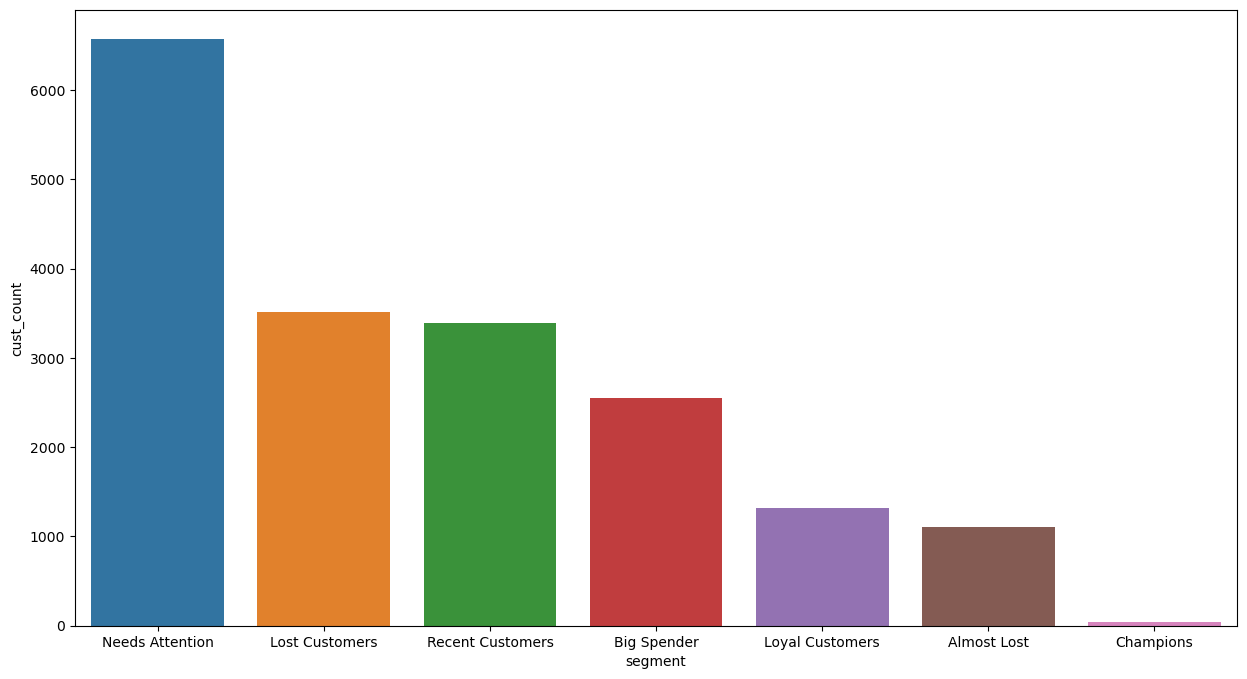

In [20]:
# Bar Chart

palette_color = sns.color_palette("tab10")
plt.figure(figsize = (15,8))
sns.barplot(x = seg_count.segment,y = seg_count.cust_count, palette = palette_color)
plt.show()

In [21]:
# Percentage of each segment 

percentage_dec = seg_count.cust_count / 18484
seg_percentage = round(percentage_dec, 4)
seg_count['percentage'] = seg_percentage * 100
seg_count

,segment,cust_count,percentage
0,Needs Attention,6573,35.56
1,Lost Customers,3511,18.99
2,Recent Customers,3392,18.35
3,Big Spender,2553,13.81
4,Loyal Customers,1315,7.11
5,Almost Lost,1103,5.97
6,Champions,37,0.20


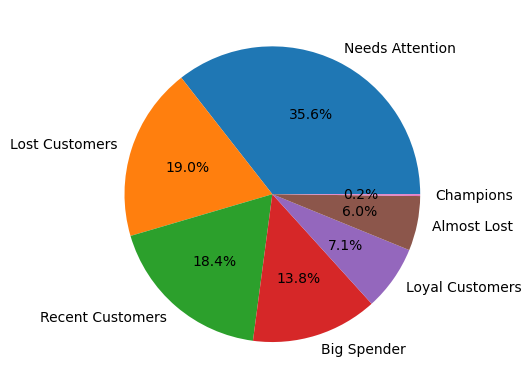

In [22]:
# Pie Chart

palette_color = sns.color_palette("tab10")
plt.pie(seg_count.cust_count, labels = seg_count.segment, colors = palette_color, autopct='%1.1f%%')
plt.show()

In [23]:
# export this rfm segmentation dataset to analyze more in viz tools to analyze more, like:
# why many customer churn, or what make customer champions, etc.

rfm.to_csv("rfm_segmented.csv", index = False)